### Step 1: Import Libraries and Define Data

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()


### Step 2: Build the Neural Network

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)   # Linear transformation from 1 input to 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Linear transformation from 64 to 32 neurons
        self.fc3 = nn.Linear(32, 5)   # Linear transformation from 32 to 5 neurons (for each country)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU non-linearity
        x = torch.relu(self.fc2(x))  # Apply ReLU non-linearity
        x = self.fc3(x)              # Linear output layer
        return x

model = SimpleNN()


### Step 3: Define Loss Function and Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Step 4: Train the Model

In [5]:
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years)
    loss = criterion(outputs, gdp_growth_data)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 45893.15234375
Epoch 100, Loss: 12.022113800048828
Epoch 200, Loss: 11.874077796936035
Epoch 300, Loss: 11.87407112121582
Epoch 400, Loss: 11.874082565307617
Epoch 500, Loss: 11.874065399169922
Epoch 600, Loss: 11.874069213867188
Epoch 700, Loss: 11.874065399169922
Epoch 800, Loss: 11.874055862426758
Epoch 900, Loss: 11.874054908752441
Epoch 1000, Loss: 11.874055862426758
Epoch 1100, Loss: 11.874045372009277
Epoch 1200, Loss: 11.874049186706543
Epoch 1300, Loss: 11.874048233032227
Epoch 1400, Loss: 11.874045372009277
Epoch 1500, Loss: 11.874056816101074
Epoch 1600, Loss: 11.874044418334961
Epoch 1700, Loss: 11.87403678894043
Epoch 1800, Loss: 11.874042510986328
Epoch 1900, Loss: 11.874028205871582
Epoch 2000, Loss: 11.87402629852295
Epoch 2100, Loss: 11.87401008605957
Epoch 2200, Loss: 11.874015808105469
Epoch 2300, Loss: 11.87399673461914
Epoch 2400, Loss: 11.873993873596191
Epoch 2500, Loss: 11.874007225036621
Epoch 2600, Loss: 11.873991966247559
Epoch 2700, Loss: 11.8

### Step 5: Predicting Future GDP Growth

In [6]:
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_predictions = model(future_years)


### Step 6: Visualize the Results

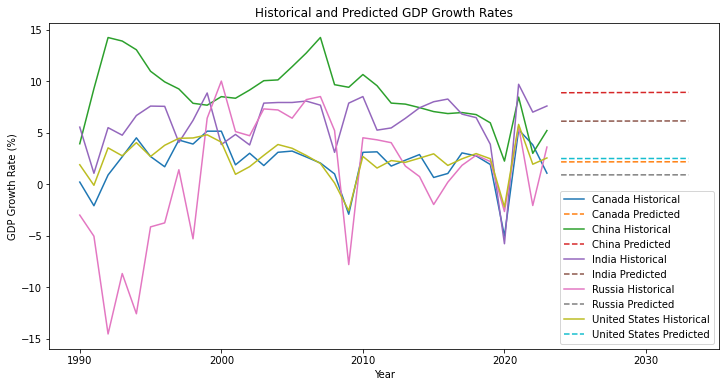

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].numpy(), label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Historical and Predicted GDP Growth Rates')
plt.legend()
plt.show()


## Exercise 1 : Solution - Add Dropout Layers

In [8]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super(SimpleNNWithDropout, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

model = SimpleNNWithDropout()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min




Epoch 0, Loss: 0.4592953324317932
Epoch 100, Loss: 0.25894299149513245
Epoch 200, Loss: 0.15280771255493164
Epoch 300, Loss: 0.12411339581012726
Epoch 400, Loss: 0.10757967084646225
Epoch 500, Loss: 0.10900277644395828
Epoch 600, Loss: 0.09585615992546082
Epoch 700, Loss: 0.09241654723882675
Epoch 800, Loss: 0.09616181999444962
Epoch 900, Loss: 0.09503154456615448
Epoch 1000, Loss: 0.07143372297286987
Epoch 1100, Loss: 0.060400526970624924
Epoch 1200, Loss: 0.06140436232089996
Epoch 1300, Loss: 0.07367020100355148
Epoch 1400, Loss: 0.0634610503911972
Epoch 1500, Loss: 0.07363677024841309
Epoch 1600, Loss: 0.06756541132926941
Epoch 1700, Loss: 0.06374747306108475
Epoch 1800, Loss: 0.04681964963674545
Epoch 1900, Loss: 0.04432488605380058
Epoch 2000, Loss: 0.044699497520923615
Epoch 2100, Loss: 0.04565862938761711
Epoch 2200, Loss: 0.042364250868558884
Epoch 2300, Loss: 0.03906190022826195
Epoch 2400, Loss: 0.04907631129026413
Epoch 2500, Loss: 0.03382835537195206
Epoch 2600, Loss: 0.046

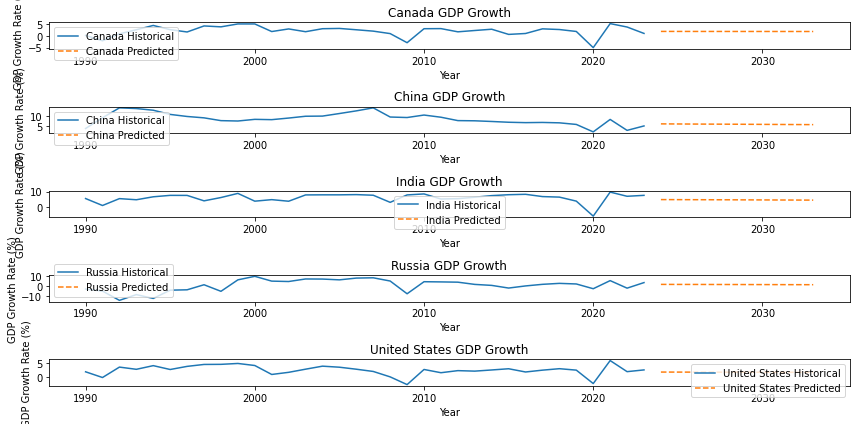

In [9]:
# Plot results
plt.figure(figsize=(12, 6))
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.subplot(5, 1, i+1)  # Create a subplot for each country
    plt.plot(years, gdp_growth_data[:, i], label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions_denorm[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.title(f'{country} GDP Growth')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

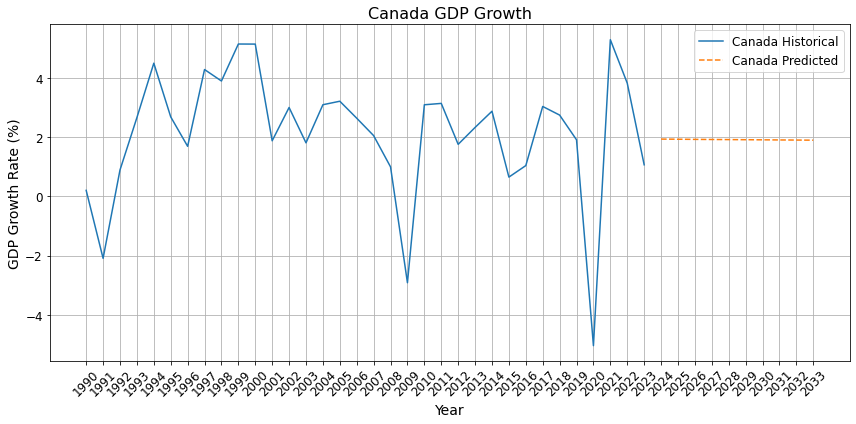

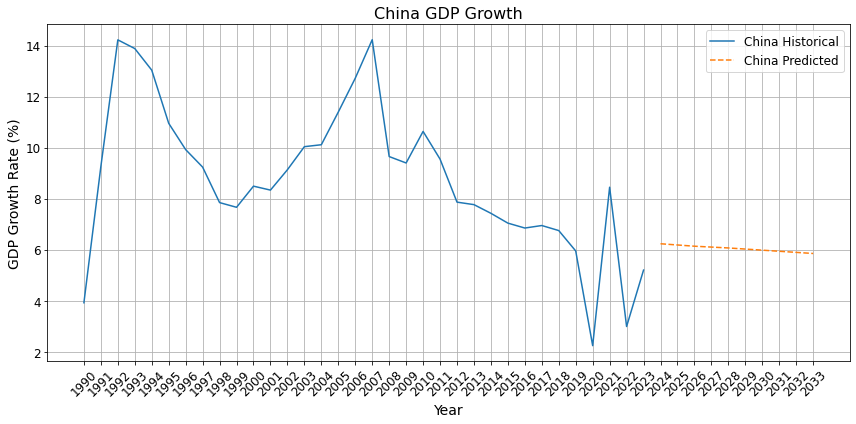

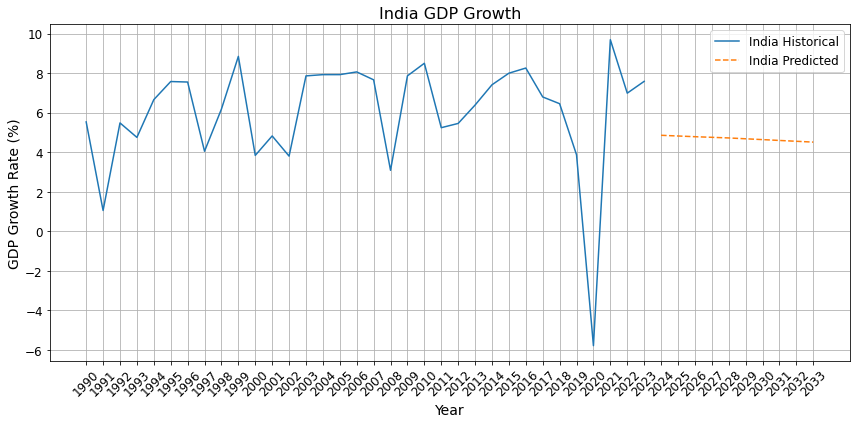

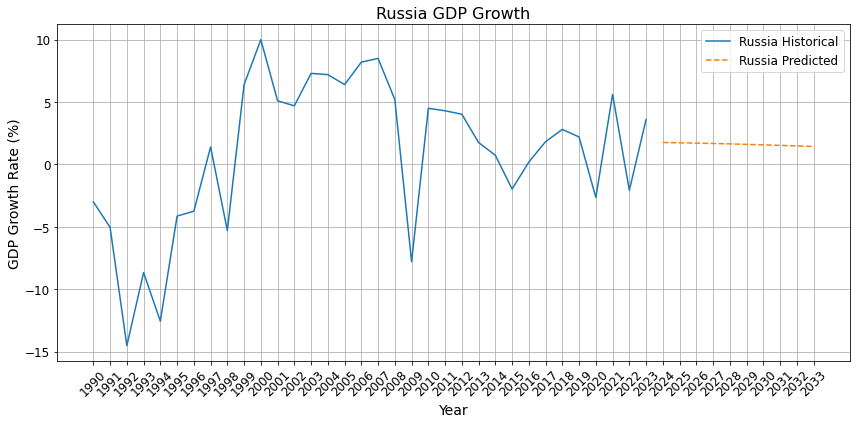

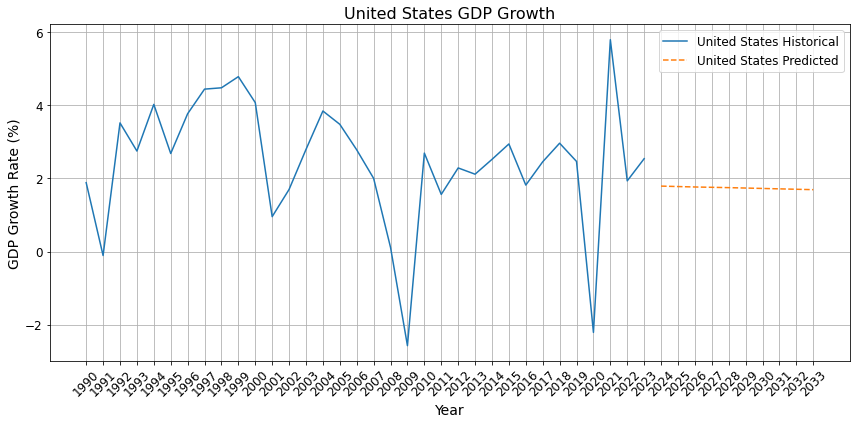

In [10]:
# Plot results: One plot per country
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.figure(figsize=(12, 6))  # Create a separate figure for each country
    plt.plot(years, gdp_growth_data[:, i], label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions_denorm[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')
    
    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('GDP Growth Rate (%)', fontsize=14)  # Make y-axis label bigger
    plt.title(f'{country} GDP Growth', fontsize=16)  # Make title bigger
    plt.legend(fontsize=12)
    
    # Set x-axis ticks to be more granular (every year)
    plt.xticks(np.arange(1990, 2034, 1), rotation=45, fontsize=12)  # Show every year, rotated for readability
    
    # Increase y-axis tick size and make them more clear
    plt.yticks(fontsize=12)  # Increase the size of y-axis tick labels
    
    # Optionally, add a grid to make the plot clearer
    plt.grid(True)
    
    # Show the plot for each country
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


## Exercise 2 : Solution - Replace ReLU with Sigmoid or Tanh Activation

In [14]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithDropoutAndSigmoidActivationFunction(nn.Module):
    def __init__(self):
        super(SimpleNNWithDropoutAndSigmoidActivationFunction, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first hidden layer
        x = torch.sigmoid(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

model = SimpleNNWithDropoutAndSigmoidActivationFunction()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.7591148614883423
Epoch 100, Loss: 0.4387272000312805
Epoch 200, Loss: 0.2841474115848541
Epoch 300, Loss: 0.20437419414520264
Epoch 400, Loss: 0.12111690640449524
Epoch 500, Loss: 0.11363827437162399
Epoch 600, Loss: 0.11619600653648376
Epoch 700, Loss: 0.10498706251382828
Epoch 800, Loss: 0.09767001867294312
Epoch 900, Loss: 0.06906191259622574
Epoch 1000, Loss: 0.08170980960130692
Epoch 1100, Loss: 0.07267986238002777
Epoch 1200, Loss: 0.0565834604203701
Epoch 1300, Loss: 0.059617333114147186
Epoch 1400, Loss: 0.06030372157692909
Epoch 1500, Loss: 0.0541381910443306
Epoch 1600, Loss: 0.061440609395504
Epoch 1700, Loss: 0.05877482891082764
Epoch 1800, Loss: 0.050265491008758545
Epoch 1900, Loss: 0.0499124713242054
Epoch 2000, Loss: 0.04630759358406067
Epoch 2100, Loss: 0.04553452506661415
Epoch 2200, Loss: 0.04951626434922218
Epoch 2300, Loss: 0.04040997102856636
Epoch 2400, Loss: 0.03668174892663956
Epoch 2500, Loss: 0.046193525195121765
Epoch 2600, Loss: 0.033532541

## Exercise 3 : Solution - Add Batch Normalization Layers

In [15]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(SimpleNNWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization after first linear layer
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)  # Batch Normalization after second linear layer
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # Apply Batch Normalization
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)  # Apply Batch Normalization
        x = self.fc3(x)
        return x


model = SimpleNNWithDropout()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.6085883378982544
Epoch 100, Loss: 0.39487332105636597
Epoch 200, Loss: 0.23471805453300476
Epoch 300, Loss: 0.14189600944519043
Epoch 400, Loss: 0.10757767409086227
Epoch 500, Loss: 0.11011624336242676
Epoch 600, Loss: 0.11264198273420334
Epoch 700, Loss: 0.10250688344240189
Epoch 800, Loss: 0.08673908561468124
Epoch 900, Loss: 0.05479032173752785
Epoch 1000, Loss: 0.07092519849538803
Epoch 1100, Loss: 0.07106513530015945
Epoch 1200, Loss: 0.06986608356237411
Epoch 1300, Loss: 0.07463658601045609
Epoch 1400, Loss: 0.05293712764978409
Epoch 1500, Loss: 0.05694336071610451
Epoch 1600, Loss: 0.06645254045724869
Epoch 1700, Loss: 0.043579909950494766
Epoch 1800, Loss: 0.052572961896657944
Epoch 1900, Loss: 0.04395066574215889
Epoch 2000, Loss: 0.0559999905526638
Epoch 2100, Loss: 0.04746522381901741
Epoch 2200, Loss: 0.04092751815915108
Epoch 2300, Loss: 0.043619196861982346
Epoch 2400, Loss: 0.03722555562853813
Epoch 2500, Loss: 0.030982499942183495
Epoch 2600, Loss: 0.03

## Exercise 4 : Solution - Implement a Custom Activation Function

In [16]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithLeakyReLU(nn.Module):
    def __init__(self):
        super(SimpleNNWithLeakyReLU, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)  # Leaky ReLU activation
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)  # Leaky ReLU activation
        x = self.fc3(x)
        return x

model = SimpleNNWithLeakyReLU()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.46285808086395264
Epoch 100, Loss: 0.2982756793498993
Epoch 200, Loss: 0.13264726102352142
Epoch 300, Loss: 0.042097192257642746
Epoch 400, Loss: 0.018372301012277603
Epoch 500, Loss: 0.015027870424091816
Epoch 600, Loss: 0.014156818389892578
Epoch 700, Loss: 0.013523634523153305
Epoch 800, Loss: 0.012984776869416237
Epoch 900, Loss: 0.01253038551658392
Epoch 1000, Loss: 0.01215485017746687
Epoch 1100, Loss: 0.011850024573504925
Epoch 1200, Loss: 0.011592455208301544
Epoch 1300, Loss: 0.011365048587322235
Epoch 1400, Loss: 0.011152025312185287
Epoch 1500, Loss: 0.010959535837173462
Epoch 1600, Loss: 0.010773250833153725
Epoch 1700, Loss: 0.010591508820652962
Epoch 1800, Loss: 0.01039892341941595
Epoch 1900, Loss: 0.010200750082731247
Epoch 2000, Loss: 0.010017135180532932
Epoch 2100, Loss: 0.009852009825408459
Epoch 2200, Loss: 0.009700375609099865
Epoch 2300, Loss: 0.00957056600600481
Epoch 2400, Loss: 0.00944739393889904
Epoch 2500, Loss: 0.009328816086053848
Epoch 2

## Exercise 5 : Solution - Experiment with Different Optimizers

In [17]:
gdp_growth_data_min = gdp_growth_data.min()
gdp_growth_data_max = gdp_growth_data.max()
gdp_growth_data_normalized = (gdp_growth_data - gdp_growth_data_min) / (gdp_growth_data_max - gdp_growth_data_min)

# Normalize the years for prediction phase
years_normalized = (years - years.min()) / (years.max() - years.min())

class SimpleNNWithLeakyReLU(nn.Module):
    def __init__(self):
        super(SimpleNNWithLeakyReLU, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x), negative_slope=0.01)  # Leaky ReLU activation
        x = torch.nn.functional.leaky_relu(self.fc2(x), negative_slope=0.01)  # Leaky ReLU activation
        x = self.fc3(x)
        return x

model = SimpleNNWithLeakyReLU()

criterion = nn.MSELoss()

# Using SGD optimizer instead of Adam
# optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer_sgd.zero_grad()
    outputs = model(years_normalized)
    loss = criterion(outputs, gdp_growth_data_normalized)
    loss.backward()
    optimizer_sgd.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Make predictions for future years
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
    future_predictions = model(future_years_normalized)

# Denormalize predictions
future_predictions_denorm = future_predictions * (gdp_growth_data_max - gdp_growth_data_min) + gdp_growth_data_min

Epoch 0, Loss: 0.4417531192302704
Epoch 100, Loss: 0.013550309464335442
Epoch 200, Loss: 0.012959538958966732
Epoch 300, Loss: 0.012776785530149937
Epoch 400, Loss: 0.01266460120677948
Epoch 500, Loss: 0.012580445036292076
Epoch 600, Loss: 0.012506922706961632
Epoch 700, Loss: 0.012437444180250168
Epoch 800, Loss: 0.012368914671242237
Epoch 900, Loss: 0.012299404479563236
Epoch 1000, Loss: 0.012226048856973648
Epoch 1100, Loss: 0.012147280387580395
Epoch 1200, Loss: 0.012063032016158104
Epoch 1300, Loss: 0.011969763785600662
Epoch 1400, Loss: 0.011865174397826195
Epoch 1500, Loss: 0.011742888949811459
Epoch 1600, Loss: 0.011613824404776096
Epoch 1700, Loss: 0.011478944681584835
Epoch 1800, Loss: 0.01133077684789896
Epoch 1900, Loss: 0.01117348950356245
Epoch 2000, Loss: 0.011010335758328438
Epoch 2100, Loss: 0.01083945482969284
Epoch 2200, Loss: 0.010661671869456768
Epoch 2300, Loss: 0.010476207360625267
Epoch 2400, Loss: 0.010288761928677559
Epoch 2500, Loss: 0.010102464817464352
Epoc